# 正则化

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 真正的函数
def g(x):
    return 0.1 * (x ** 3 + x ** 2 + x)

In [4]:
# 随意准备一些向真正的函数加入了一点噪声的训练数据
train_x = np.linspace(-2, 2, 8)
train_y = g(train_x) + np.random.randn(train_x.size) * 0.05

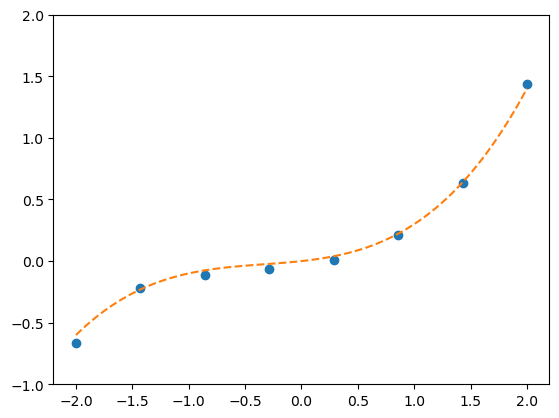

In [5]:
# 绘图确认
x = np.linspace(-2, 2, 100)
plt.plot(train_x, train_y, 'o')
plt.plot(x, g(x), linestyle='dashed')
plt.ylim(-1, 2)
plt.show()

In [6]:
# 标准化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

In [7]:
train_z = standardize(train_x)

In [8]:
# 创建训练数据的矩阵
def to_matrix(x):
    return np.vstack([
        np.ones(x.size),
        x,
        x ** 2,
        x ** 3,
        x ** 4,
        x ** 5,
        x ** 6,
        x ** 7,
        x ** 8,
        x ** 9,
        x ** 10
    ]).T

In [9]:
X = to_matrix(train_z)

In [10]:
# 参数初始化
theta = np.random.randn(X.shape[1])

In [11]:
# 预测函数
def f(x):
    return np.dot(x, theta)

## 不应用正则化实现

In [13]:
# 目标函数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [14]:
# 学习率
ETA = 1e-4

In [15]:
# 误差
diff = 1

In [16]:
# 重复学习（不应用正则化）
error = E(X, train_y)
while diff > 1e-6:
    theta = theta - ETA * (np.dot(f(X) - train_y, X))

    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

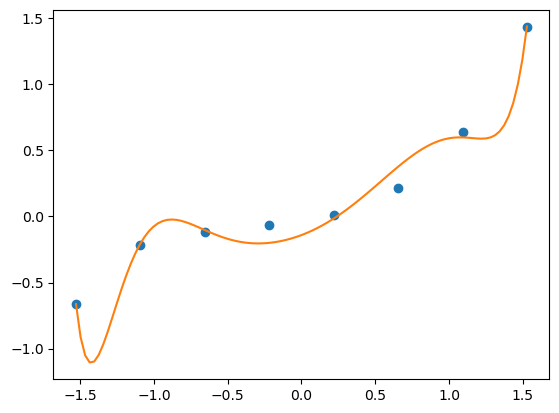

In [17]:
# 对结果绘图
z = standardize(x)
plt.plot(train_z, train_y, 'o')
plt.plot(z, f(to_matrix(z)))
plt.show()

## 应用了正则化实现

In [19]:
# 保存未正则化的参数，然后再次参数初始化
theta1 = theta
theta = np.random.randn(X.shape[1])

In [20]:
# 正则化常量
LAMBDA = 1

In [21]:
# 误差
diff = 1

In [22]:
# 重复学习（应用正则化）
theta = np.random.randn(X.shape[1])
diff = 1
error = E(X, train_y)
while diff > 1e-6:
    reg_term = LAMBDA * np.hstack([0, theta[1:]])
    theta = theta - ETA * (np.dot(f(X) - train_y, X) + reg_term)

    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

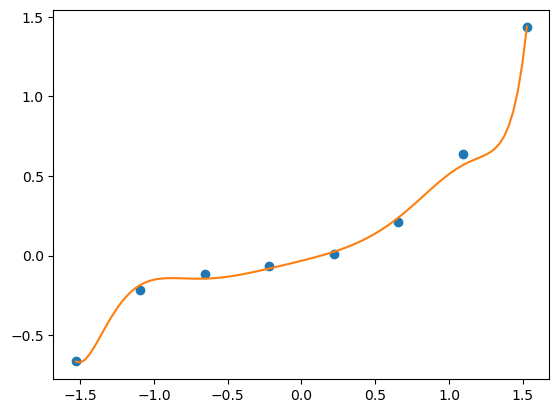

In [23]:
# 对结果绘图
plt.plot(train_z, train_y, 'o')
plt.plot(z, f(to_matrix(z)))
plt.show()

## 对比

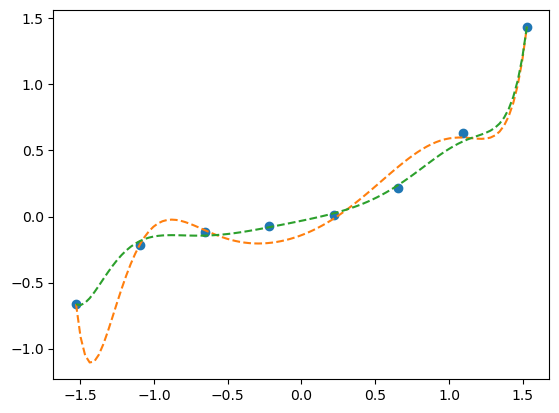

In [25]:
# 保存应用了正则化的参数
theta2 = theta

plt.plot(train_z, train_y, 'o')

# 画出未应用正则化的结果
theta = theta1
plt.plot(z, f(to_matrix(z)), linestyle='dashed')

# 画出应用了正则化的结果
theta = theta2
plt.plot(z, f(to_matrix(z)), linestyle='dashed')
plt.show()